In [ ]:
!pip install shap

In [2]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
def metrics(model):
  R2_test = r2_score(y_test, model.predict(X_test))
  print("R2 Score(Test): {:.5f}".format(R2_test))
  R2_train = r2_score(y_train, model.predict(X_train))
  print("R2 Score(Train): {:.5f}".format(R2_train))
  mse_test = mean_squared_error(y_test, model.predict(X_test))
  print("MSE(Test): {:.5f}".format(mse_test))
  mse_train = mean_squared_error(y_train, model.predict(X_train))
  print("MSE(Train): {:.5f}".format(mse_train))
  mae_test = mean_absolute_error(y_test, model.predict(X_test))
  print("MAE(Test): {:.5f}".format(mae_test))
  mae_train = mean_absolute_error(y_train, model.predict(X_train))
  print("MAE(Train): {:.5f}".format(mae_train))
  rmse_test = np.sqrt(np.mean((y_test - model.predict(X_test)) ** 2))
  print("RMSE(Test): {:.5f}".format(rmse_test))
  rmse_train = np.sqrt(np.mean((y_train - model.predict(X_train)) ** 2))
  print("RMSE(Train): {:.5f}".format(rmse_train))

In [20]:
Paper1 = pd.read_excel('/content/data_paper1.xlsx',sheet_name='XRD+PL')
X = Paper1.drop('delta(eff)', axis=1)
y = Paper1['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [26]:
model = GradientBoostingRegressor(n_estimators=337, learning_rate=0.03011, subsample=0.9886,min_samples_split=9,random_state=78)
model.fit(X_train, y_train);
metrics(model)

R2 Score(Test): 0.91416
R2 Score(Train): 0.91791
MSE(Test): 0.04333
MSE(Train): 0.03895
MAE(Test): 0.18216
MAE(Train): 0.15721
RMSE(Test): 0.20815
RMSE(Train): 0.19735


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


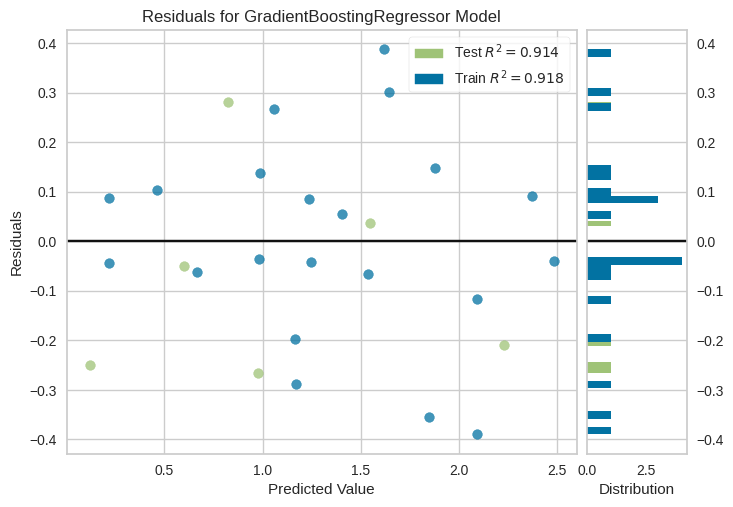

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [34]:
visualizer = ResidualsPlot(model)
visualizer.score(X_test,y_test)
visualizer.fit(X_train,y_train)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


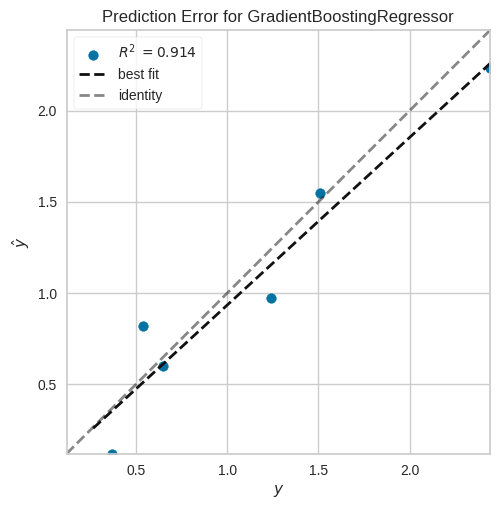

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [35]:
visualizer = PredictionError(model,alpha=1)
visualizer.score(X_test,y_test)
visualizer.fit(X_train,y_train)
visualizer.show()

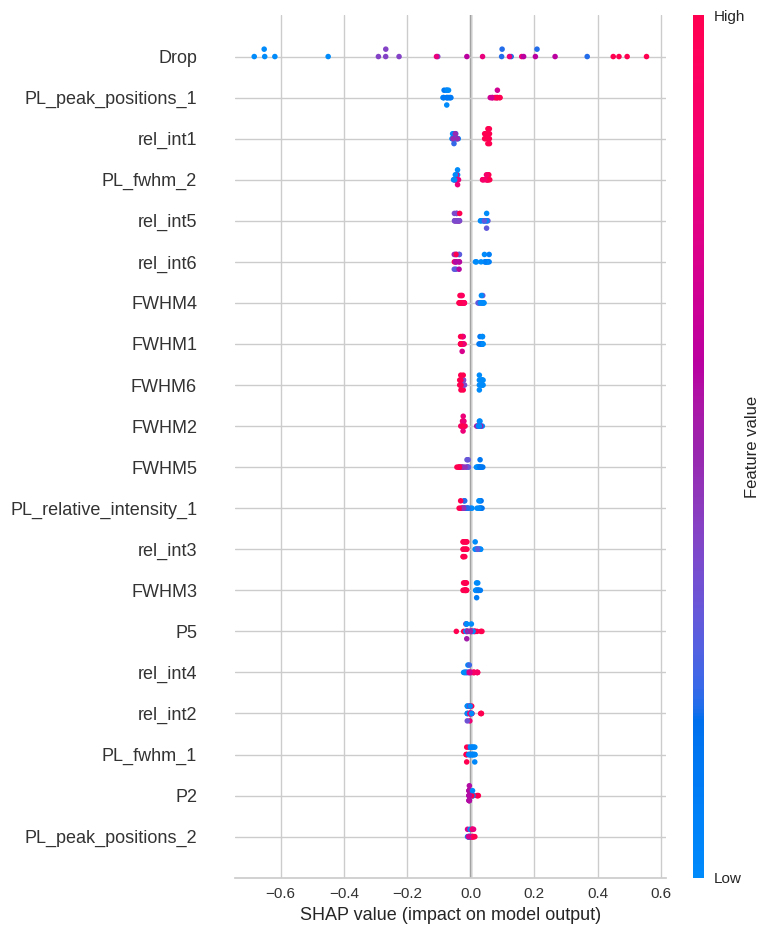

In [27]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,X)

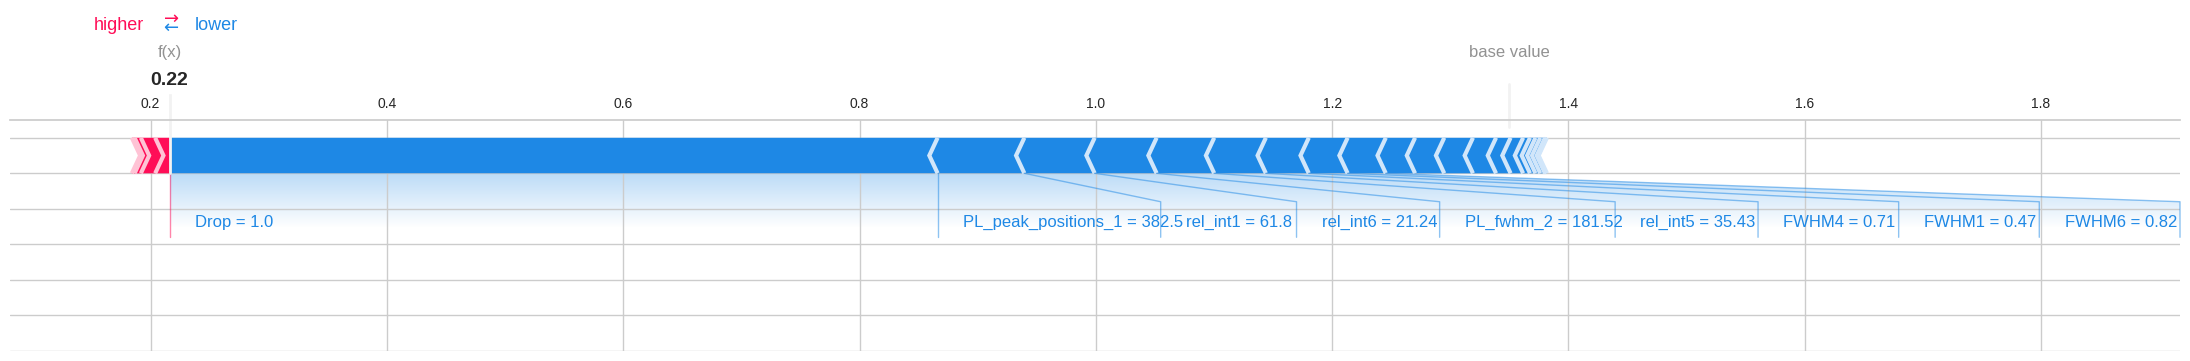

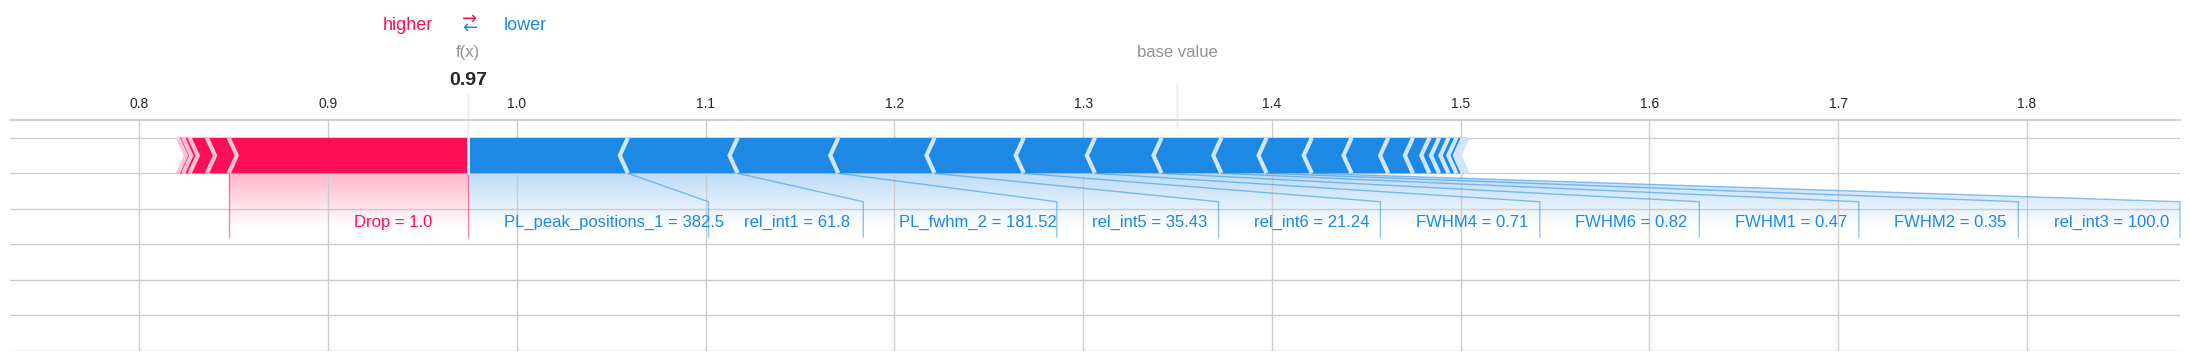

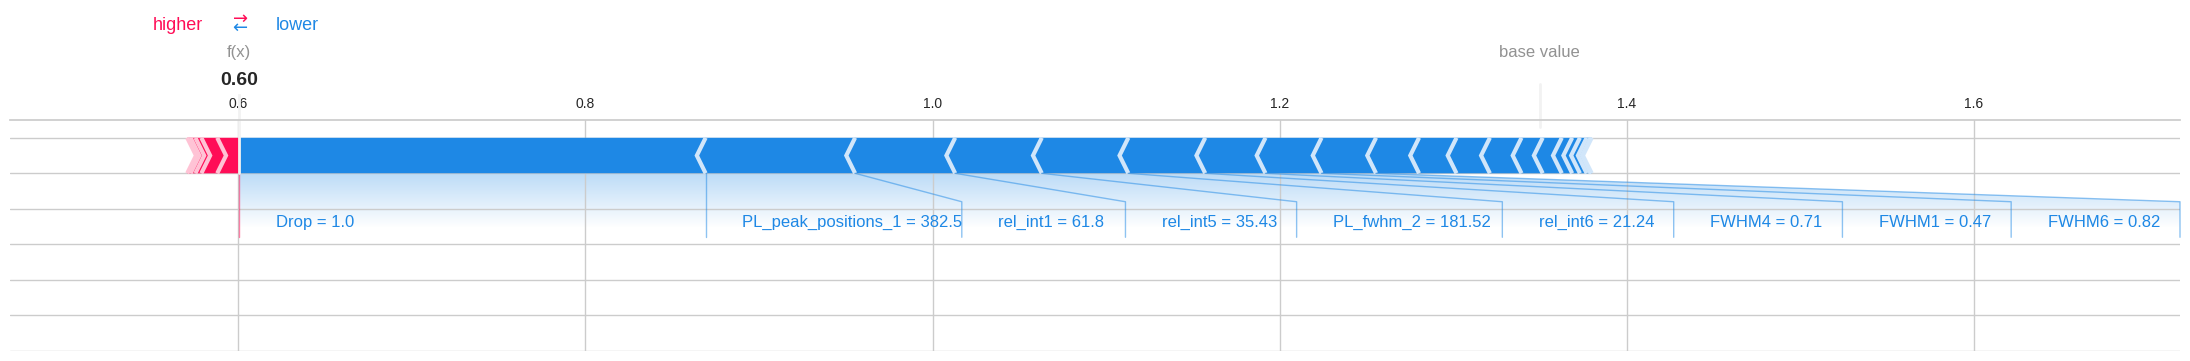

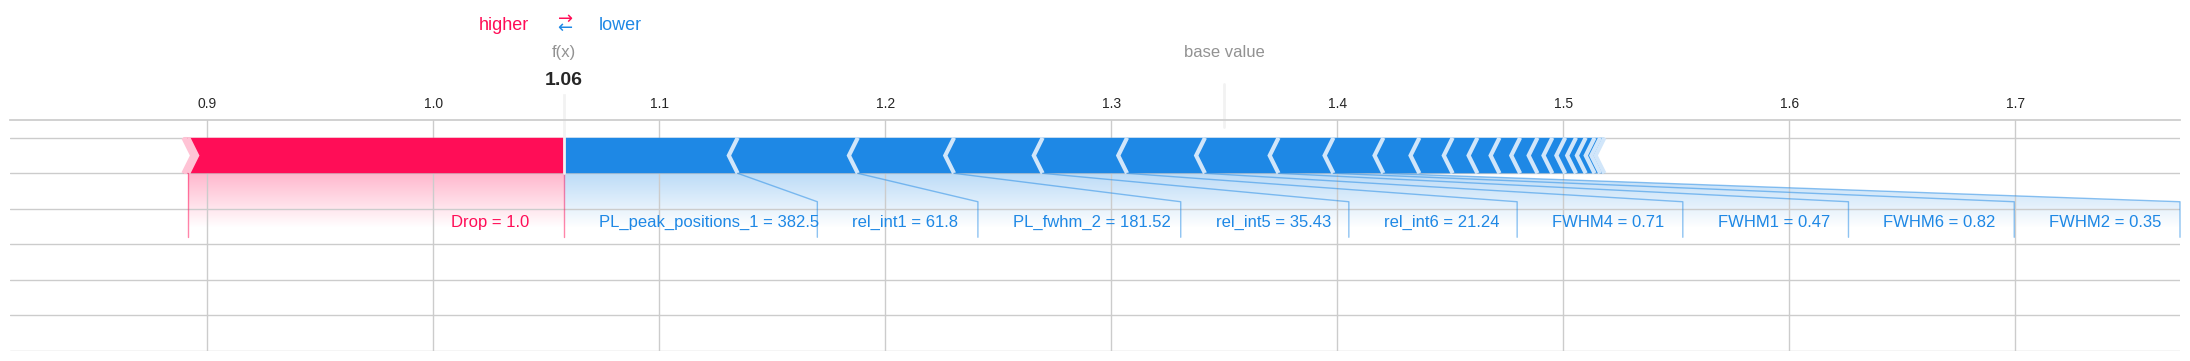

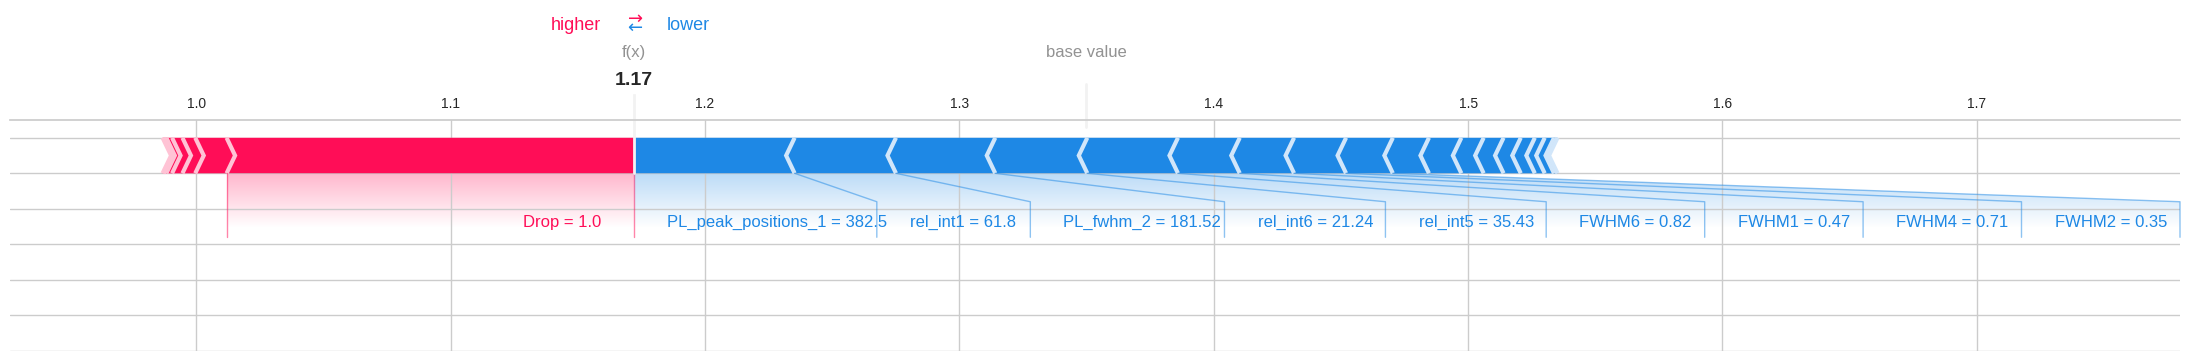

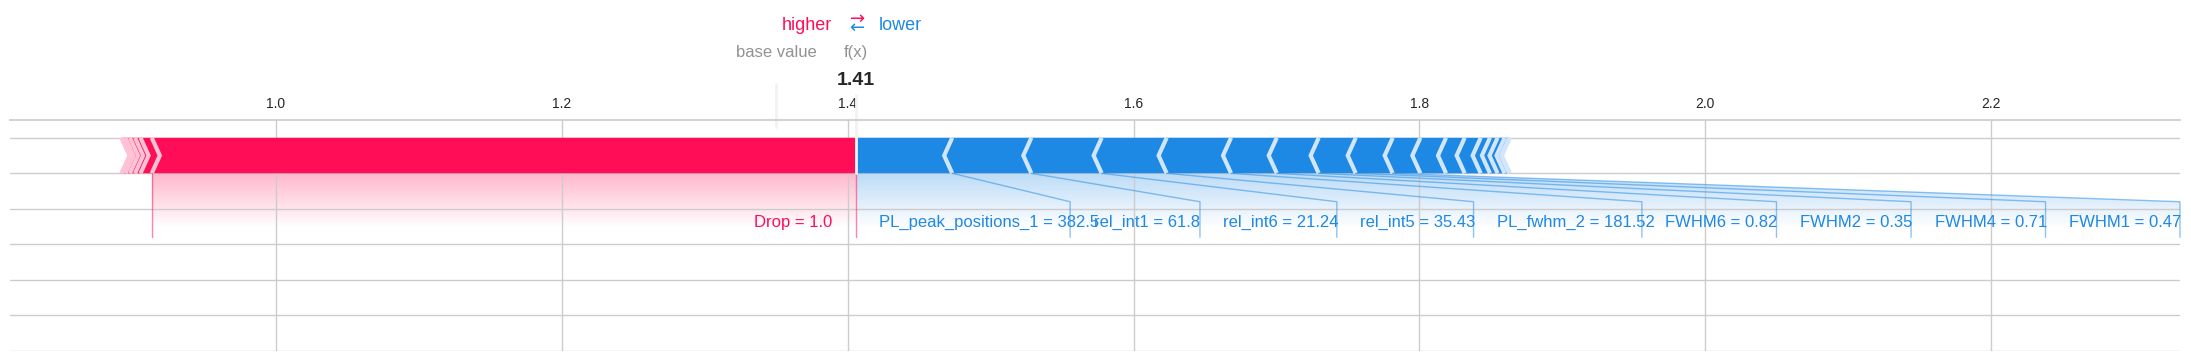

In [28]:
#Sample 1
for i in range(0,6):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(28,3)
)

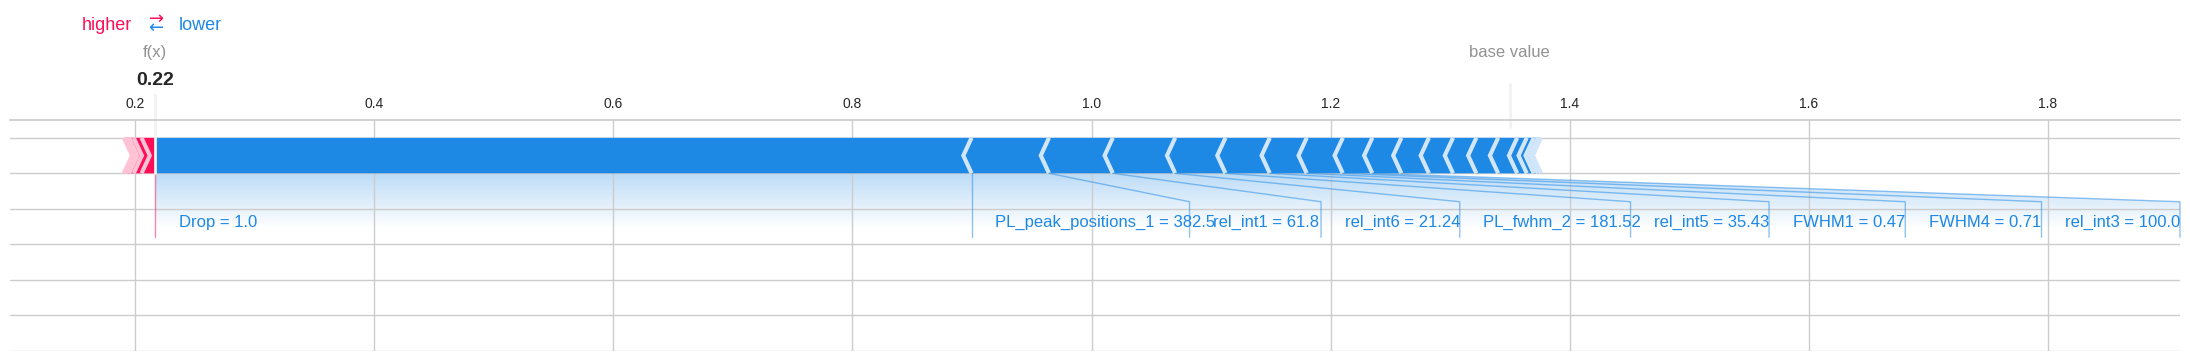

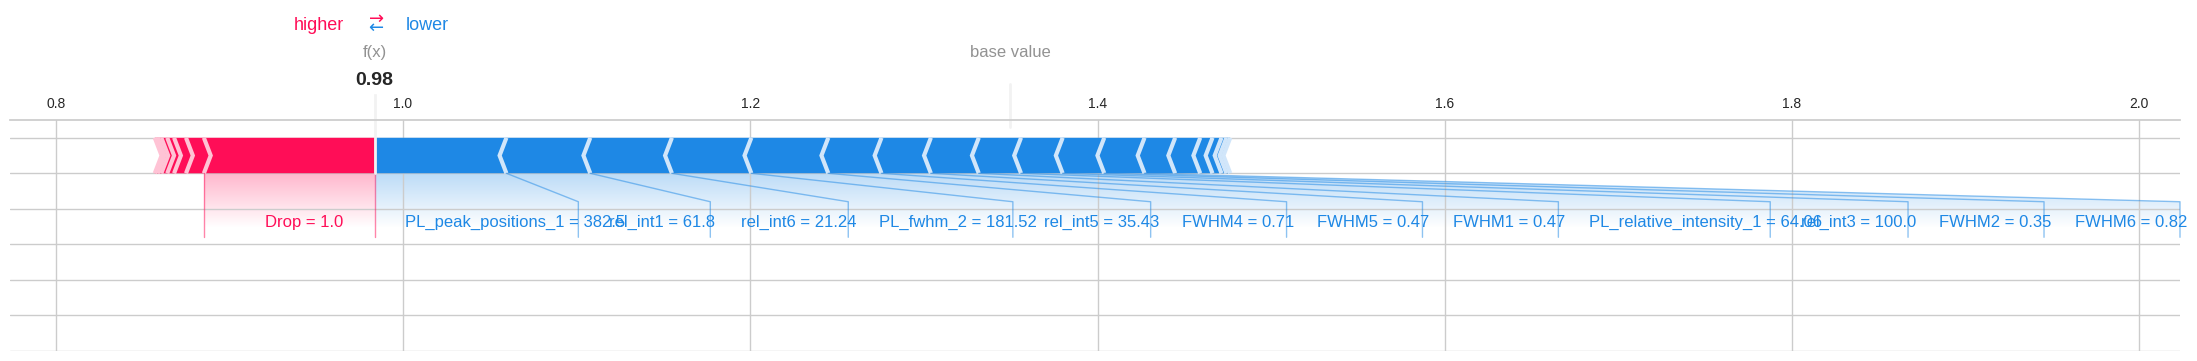

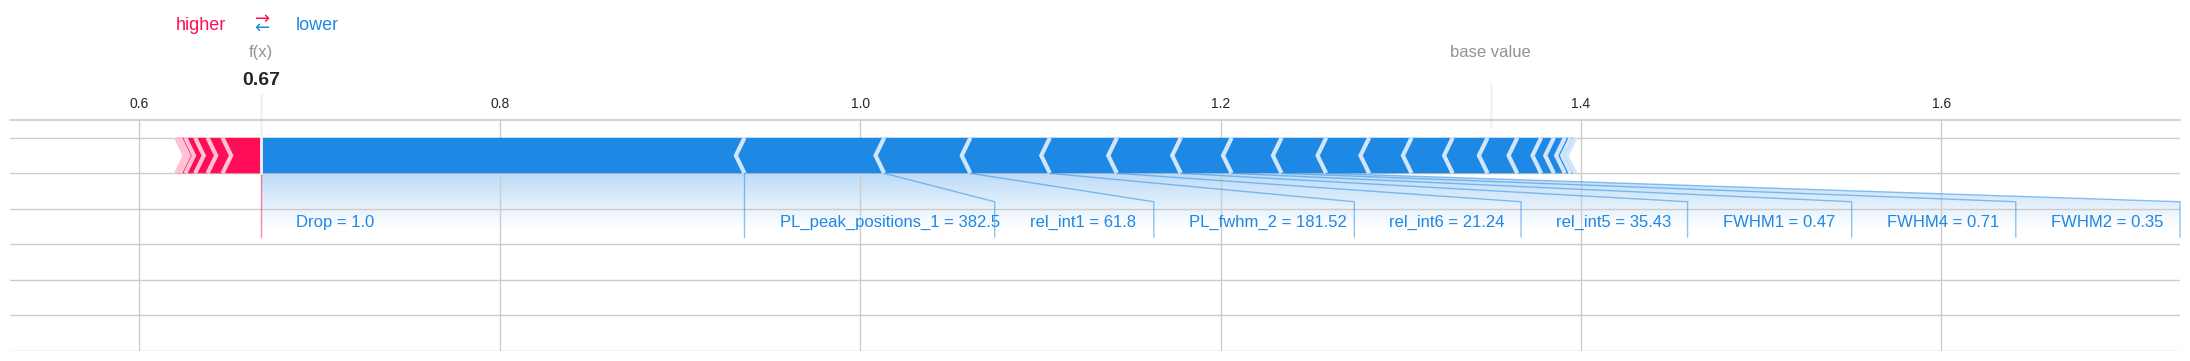

In [29]:
#Sample 2
for i in range(6,9):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(28,3)
)

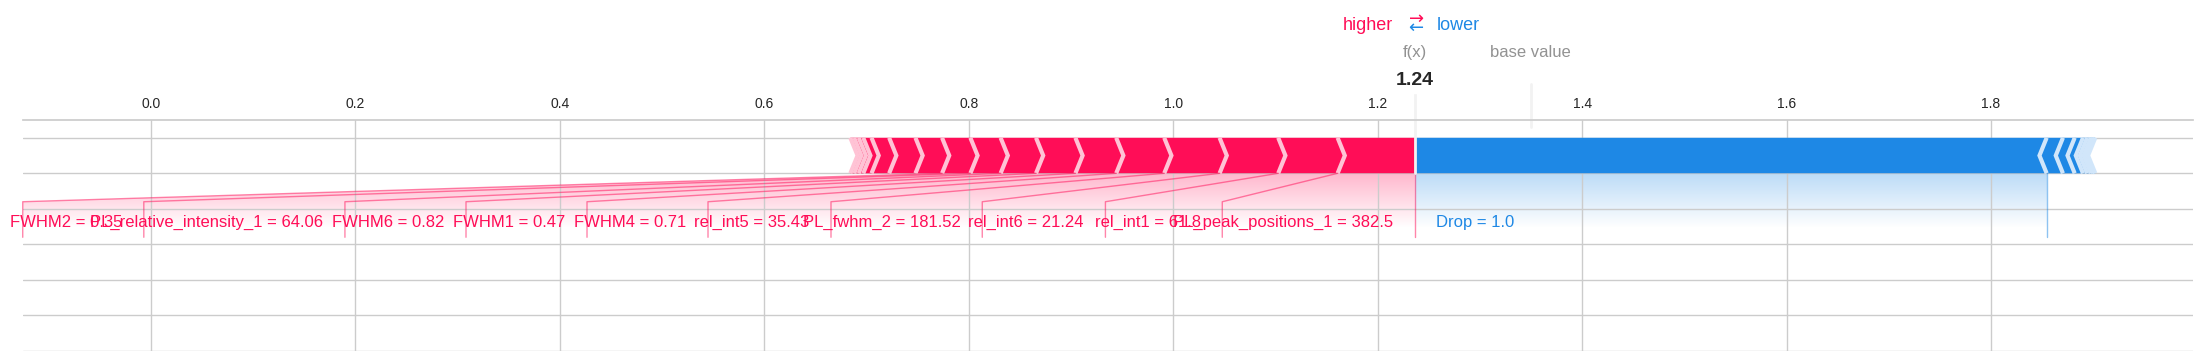

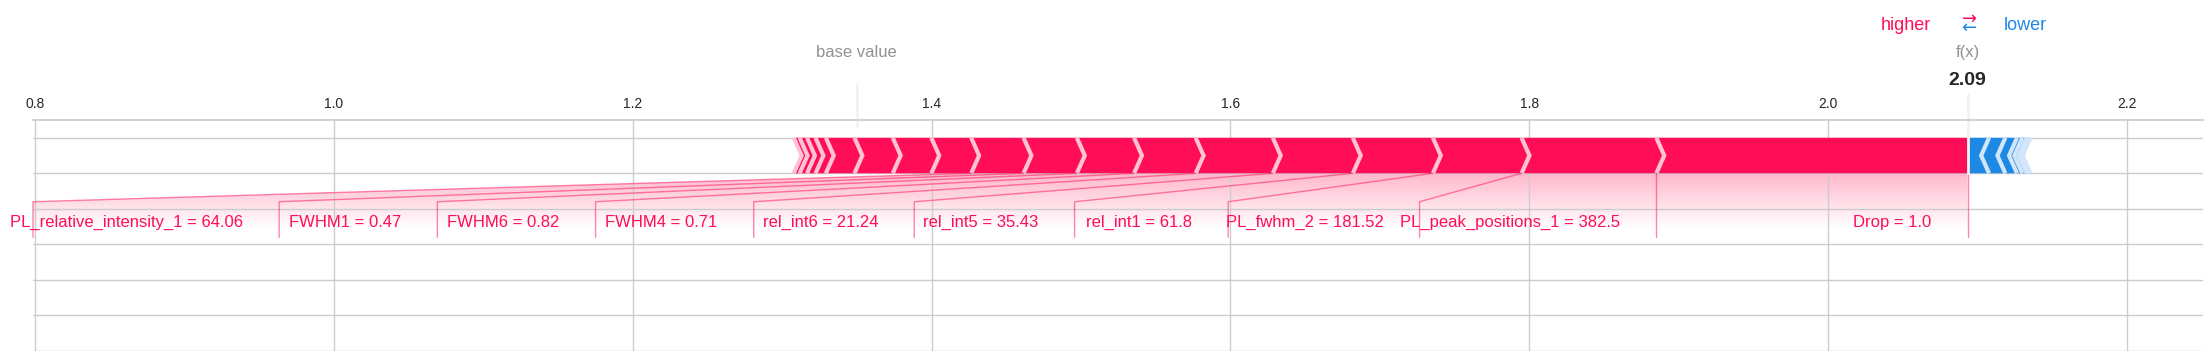

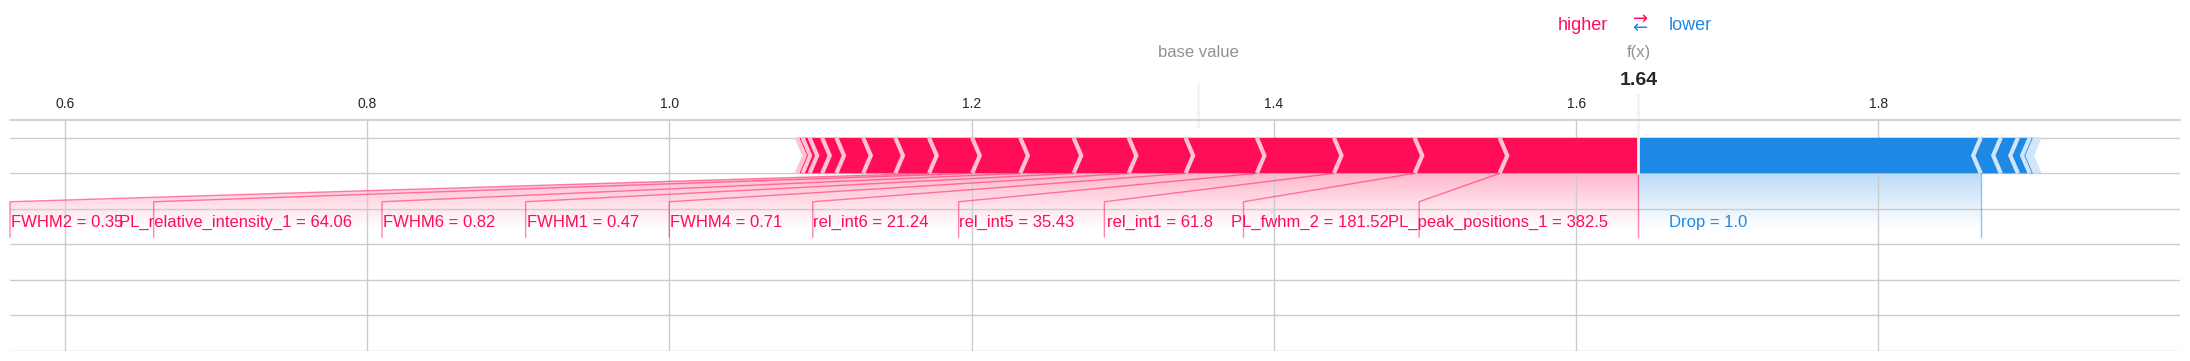

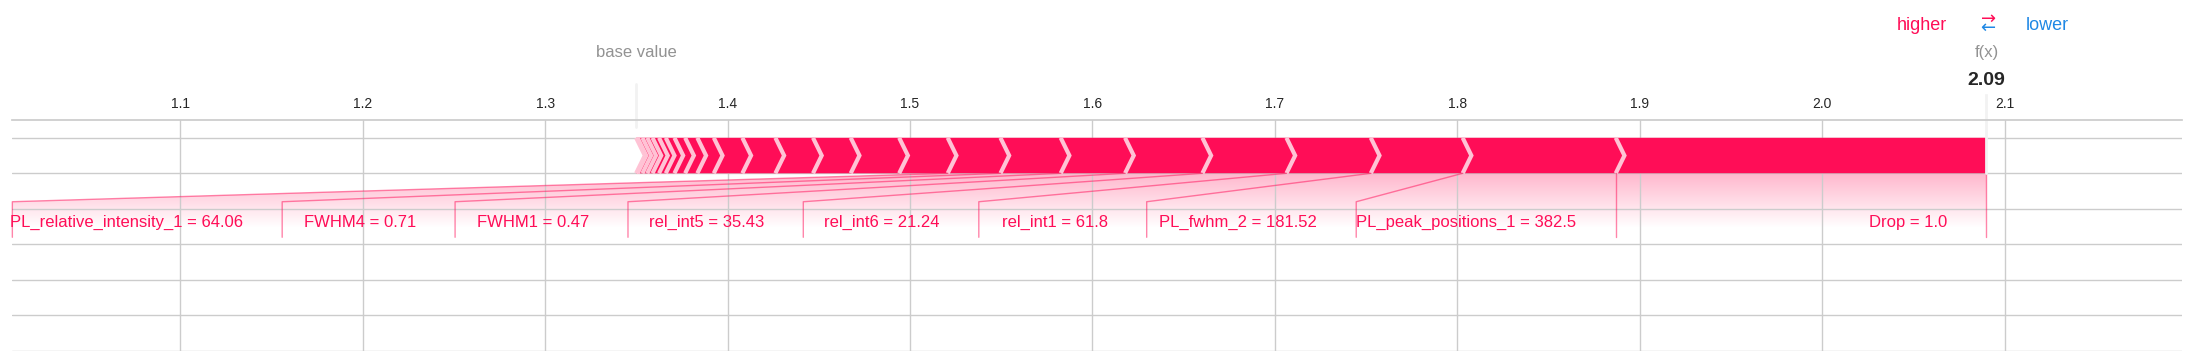

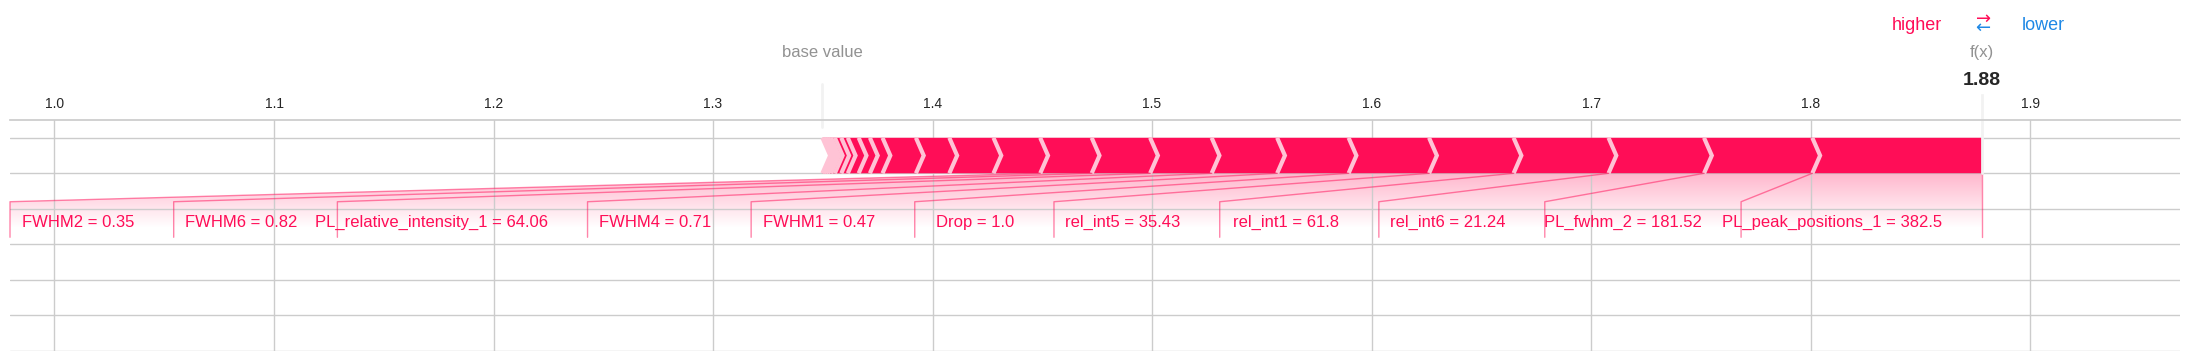

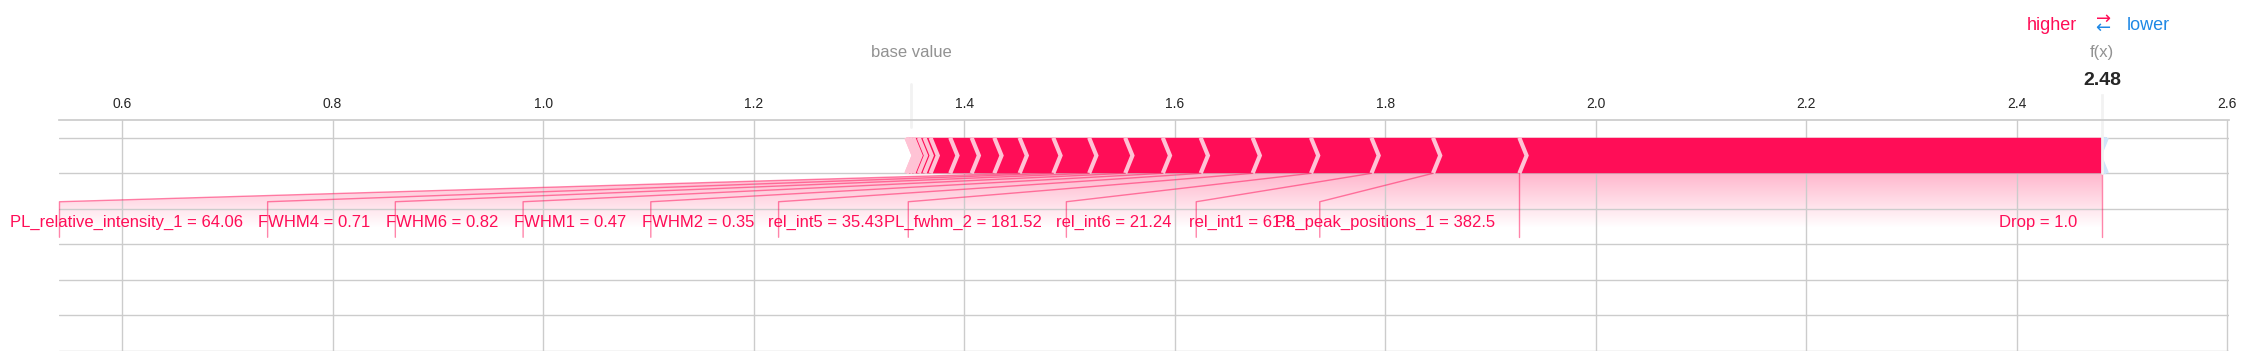

In [30]:
#Sample 3, Highest efficiency
for i in range(9,15):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(28,3)
)

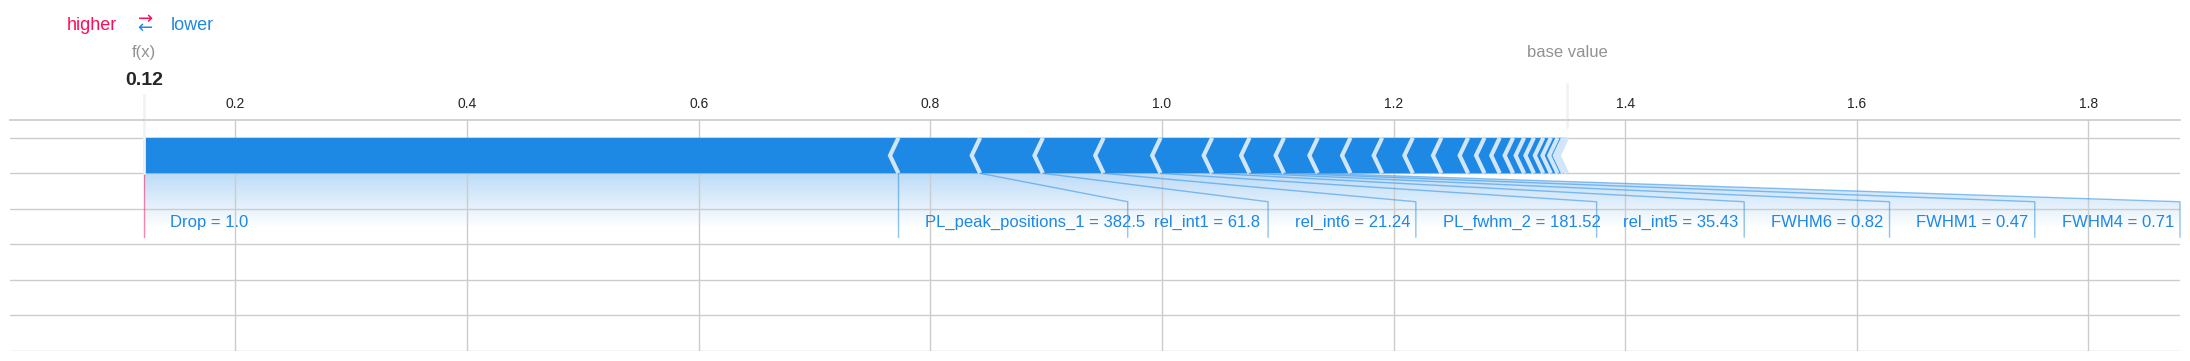

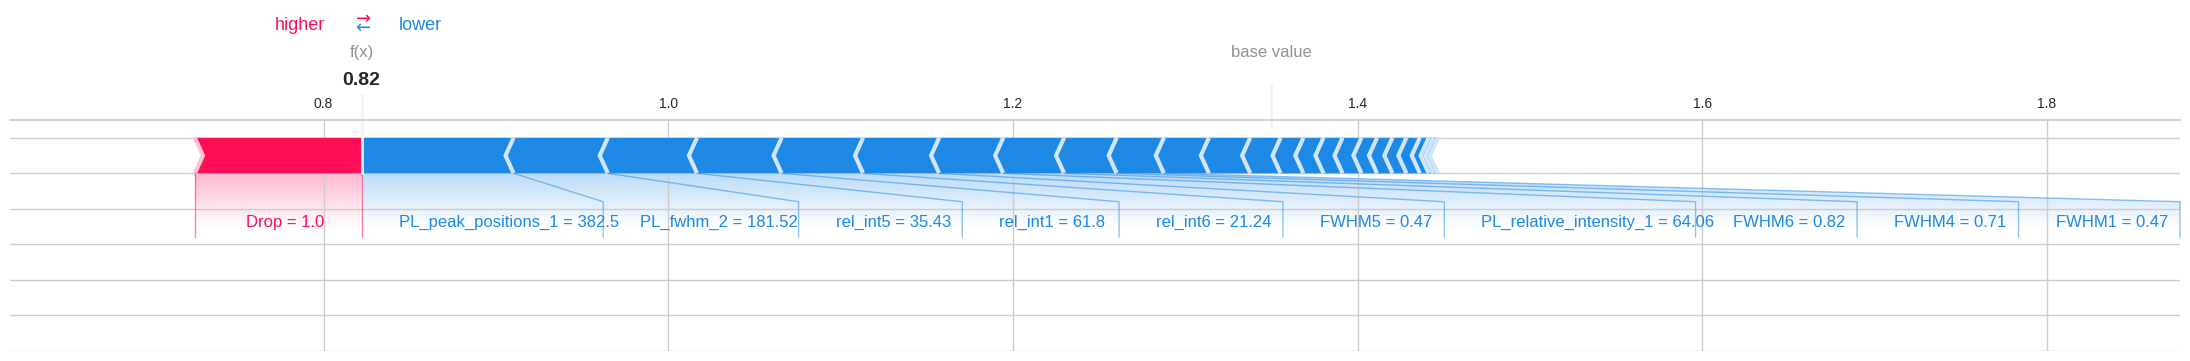

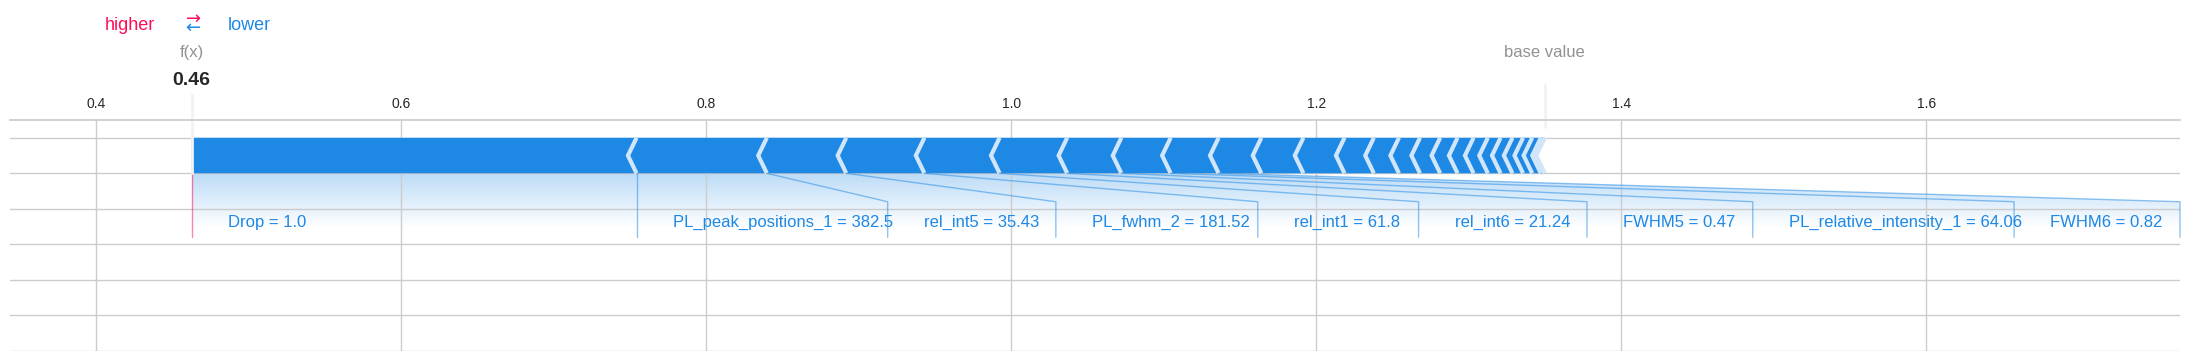

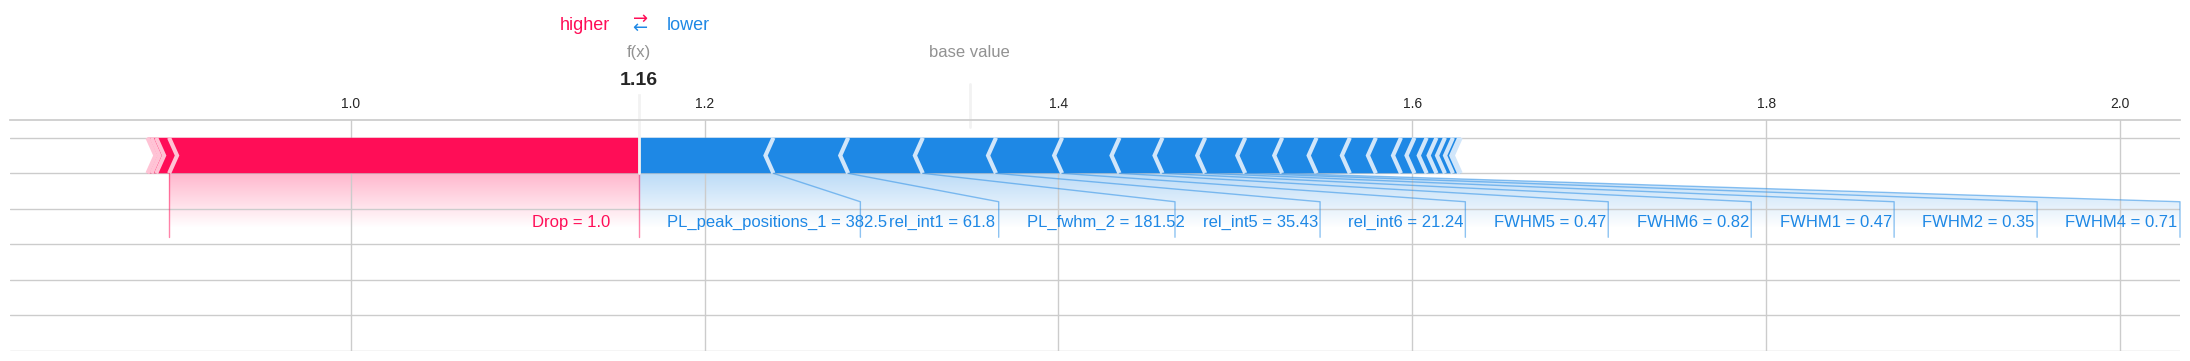

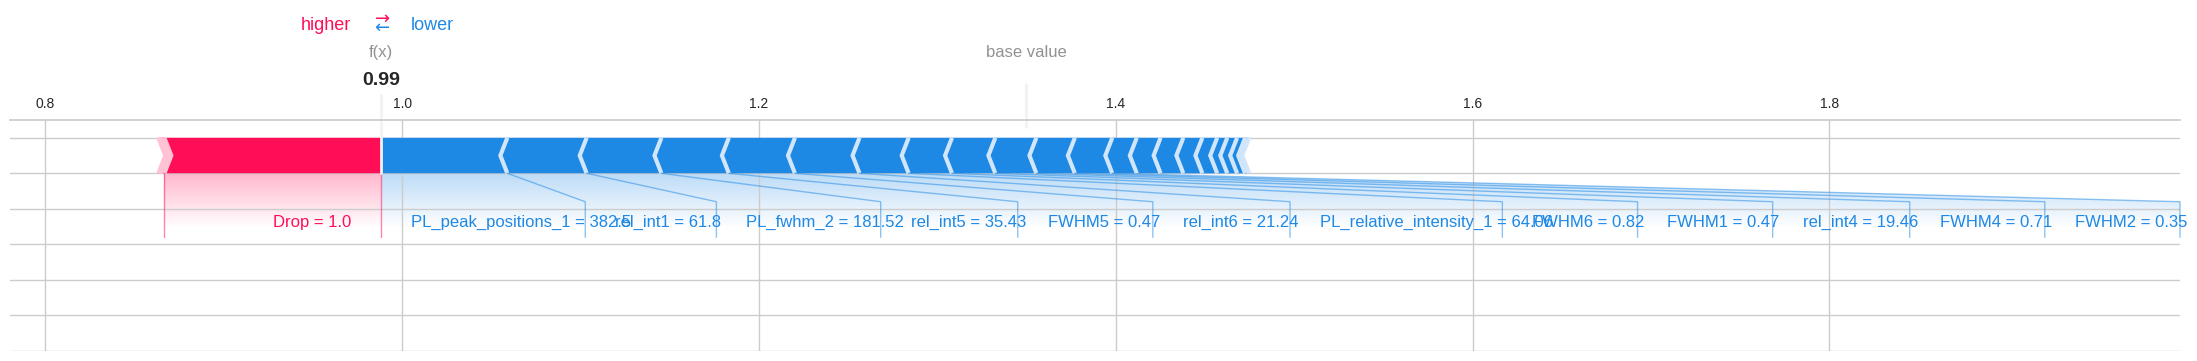

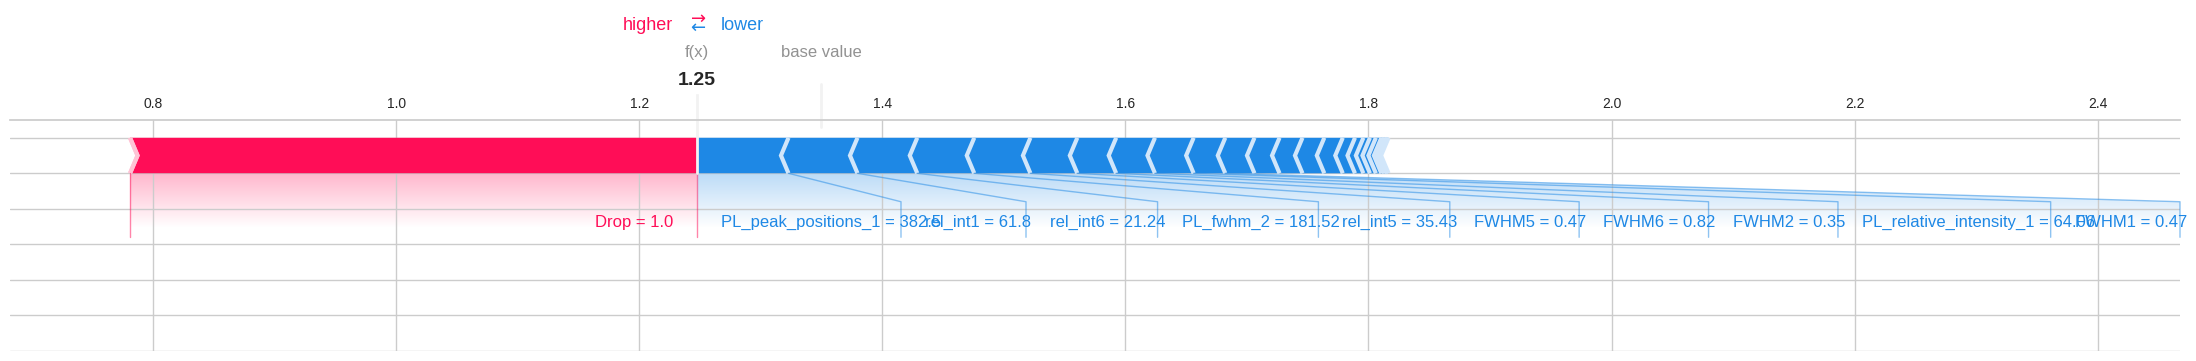

In [31]:
#Sample 4
for i in range(15,21):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(28,3)
)

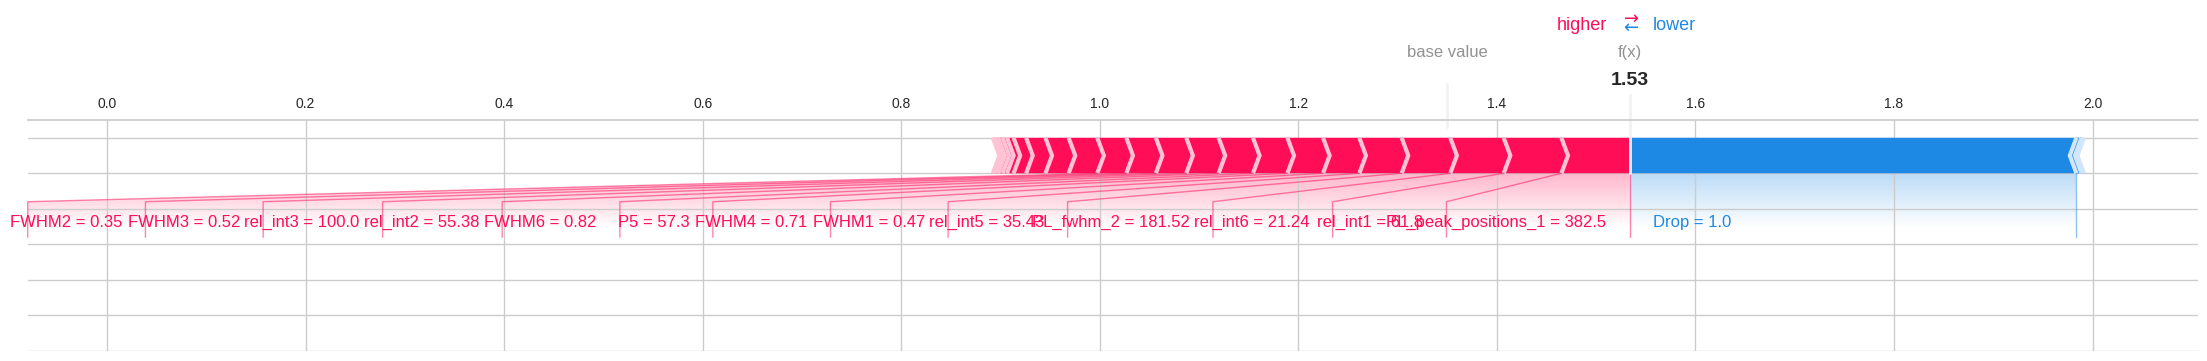

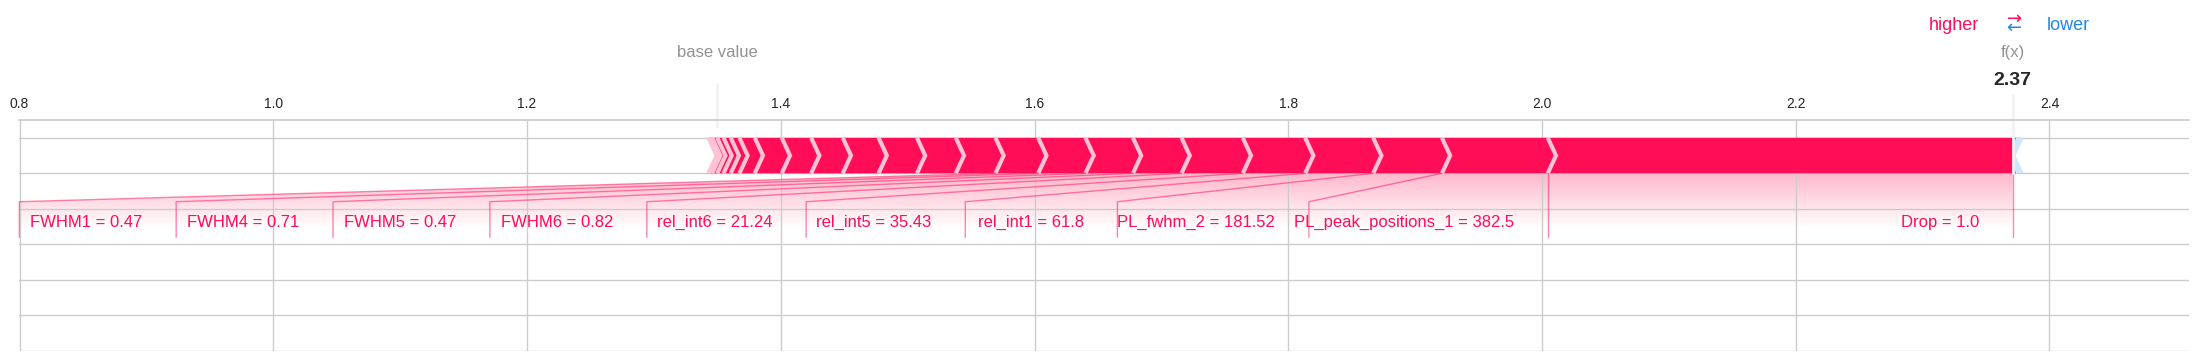

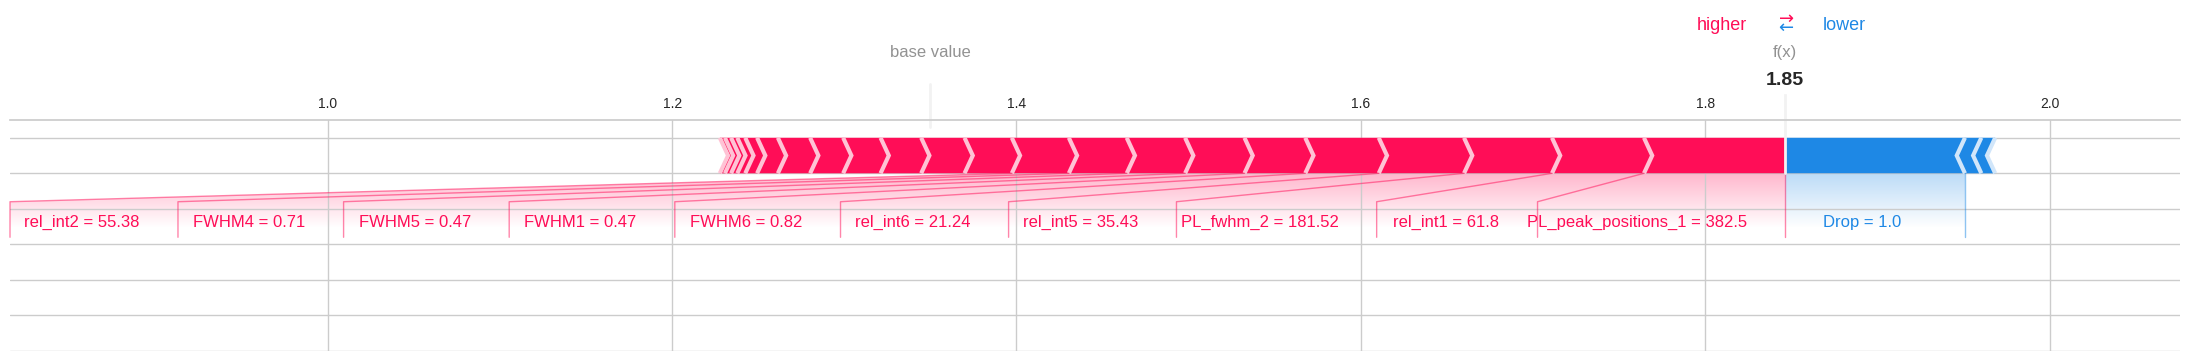

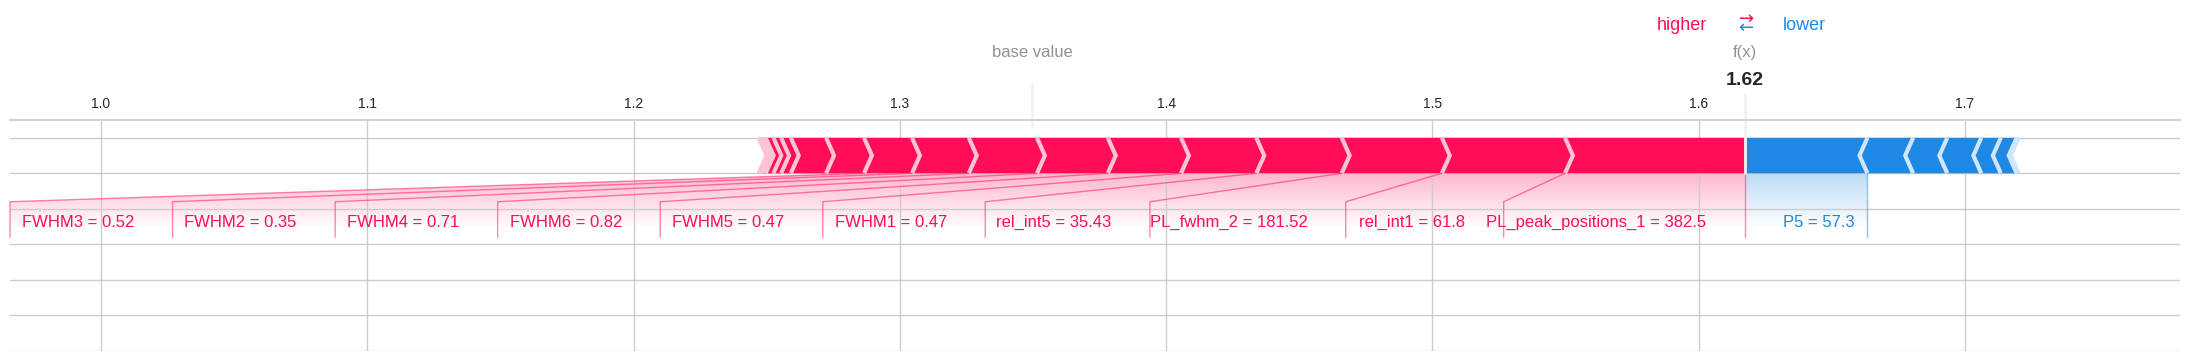

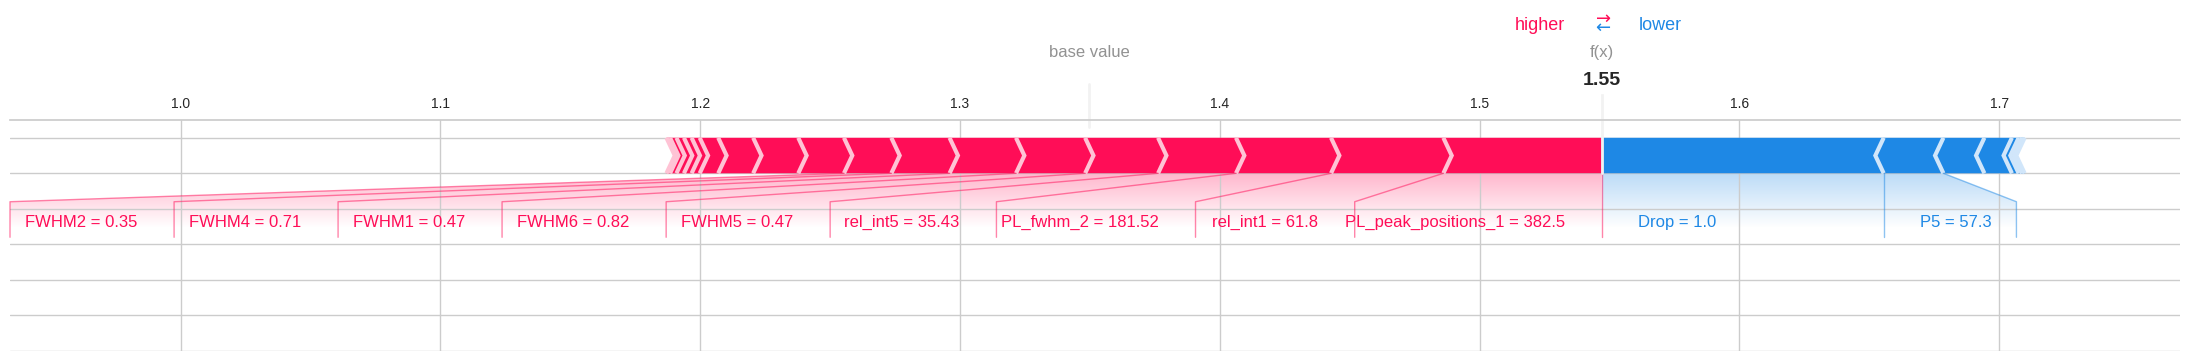

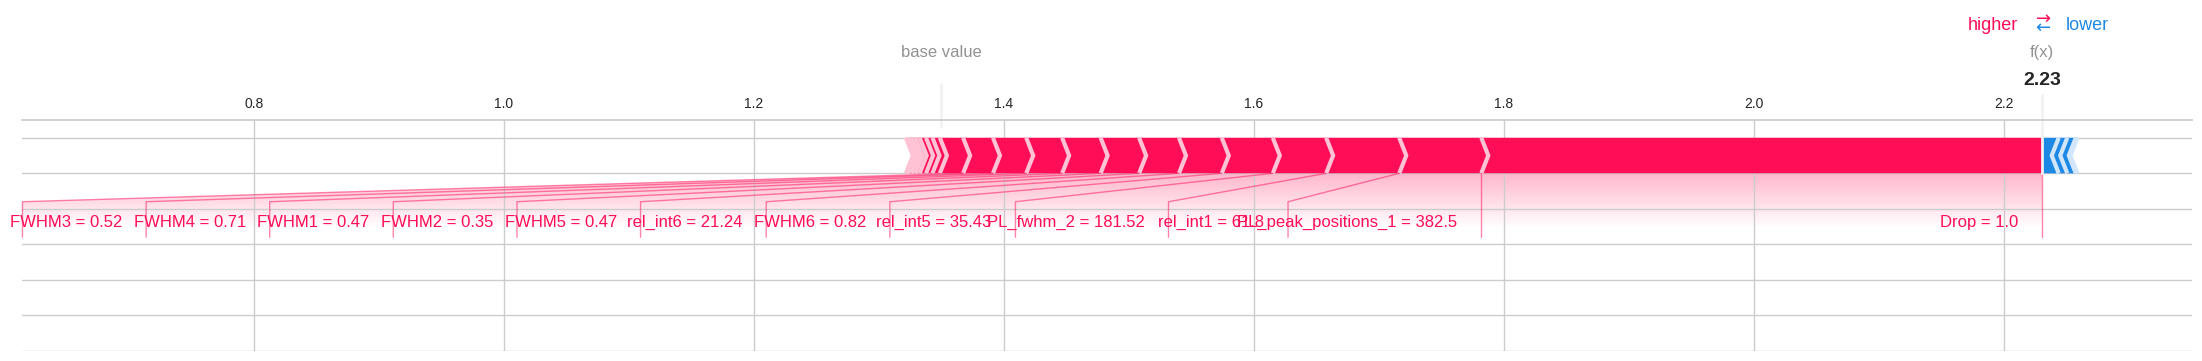

In [32]:
#Sample 5
for i in range(21,27):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(28,3)
)

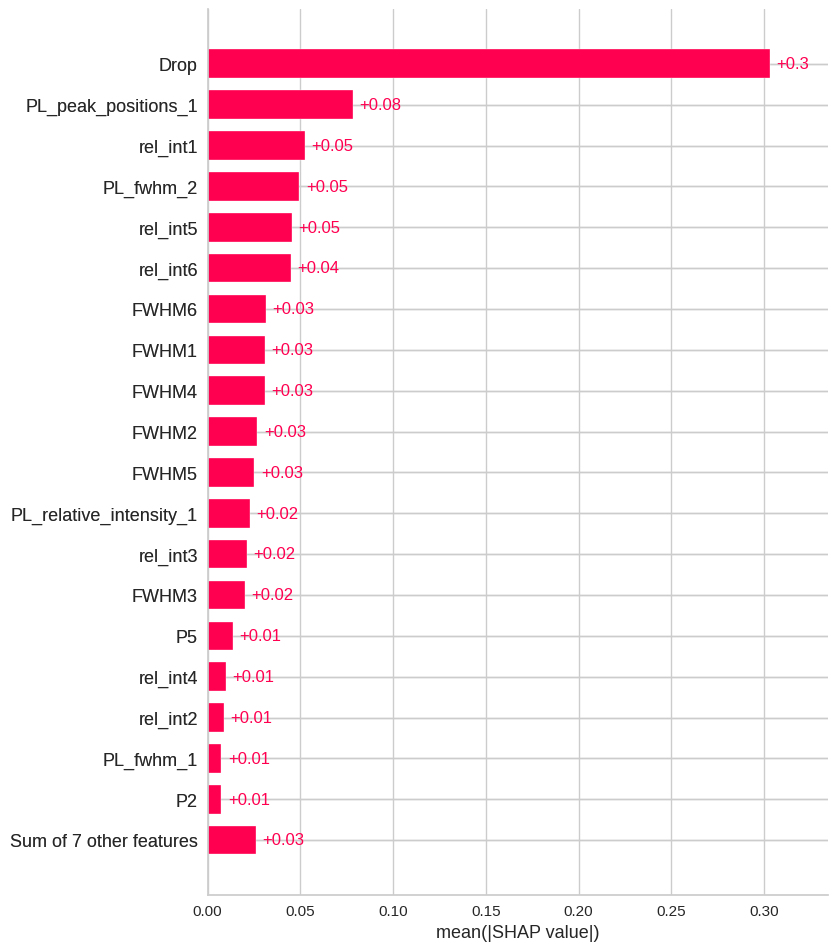

In [33]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=20)